In [13]:
import os, sys

# Get the absolute path of the notebook's directory
notebook_dir = os.getcwd()

# Navigate to the parent directory
parent_dir = os.path.abspath(os.path.join(notebook_dir, ".."))

# Add the parent directory to sys.path so we can import modules
sys.path.append(parent_dir)

# Verify the path
print(f"Added to sys.path: {parent_dir}")

# Add it to sys.path
sys.path.append(parent_dir)

print(parent_dir)
from localityaware.module import *
from NSGA_nn.nsga import *

Added to sys.path: /Users/panwapromtep/Library/CloudStorage/OneDrive-JohnsHopkins/Process Design/Aspen
/Users/panwapromtep/Library/CloudStorage/OneDrive-JohnsHopkins/Process Design/Aspen


In [14]:
import pickle
import torch

run_id = 'flash/run_2025-04-11_20-26-52'

# Open out.pkl from the specified run_id
with open(f'./results/{run_id}/out.pkl', 'rb') as file:
    out = pickle.load(file)
print(out.keys())
y_path = out['y_path']
x_path = out['x_path']
assSim_call_count = out['assSim_call_count']
iteration_log = out['iteration_log']
populations = out['populations']
data_gen_time = out['data_gen_time']
total_original_assSim_calls = out['total_original_assSim_calls']

# Open scaler.pkl from the specified run_id
with open(f'./results/{run_id}/scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Load the model from the specified run_id
model = out['model']
model.eval()

dataset = out['dataset']
print("data_gen_time", data_gen_time)

dict_keys(['model', 'x_path', 'y_path', 'dataset', 'assSim_call_count', 'populations', 'iteration_log', 'data_gen_time', 'total_original_assSim_calls'])
data_gen_time 114.87308549880981


In [15]:
print(iteration_log)

[{'iteration': 0, 'time_sec': 7.043136358261108, 'assSim_calls': 1, 'x': array([6.7801805, 4.175062 ], dtype=float32), 'y': 1410.0906170064757}, {'iteration': 1, 'time_sec': 3.0290346145629883, 'assSim_calls': 7, 'x': array([19.977625 ,  3.4231799], dtype=float32), 'y': 1769.847915446232}, {'iteration': 2, 'time_sec': 7.433387517929077, 'assSim_calls': 13, 'x': array([18.212395 ,  3.7016554], dtype=float32), 'y': 1522.6458861806402}, {'iteration': 3, 'time_sec': 2.9466729164123535, 'assSim_calls': 19, 'x': array([11.316871 ,  4.1933393], dtype=float32), 'y': 1242.64546335151}, {'iteration': 4, 'time_sec': 3.255624294281006, 'assSim_calls': 25, 'x': array([11.672319,  4.158849], dtype=float32), 'y': 1211.503437346477}]


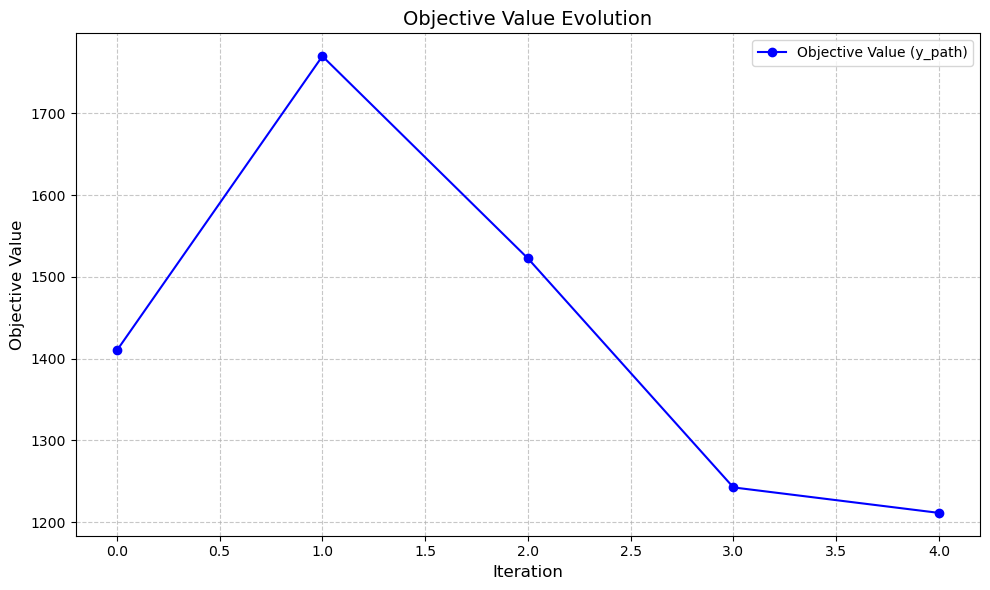

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(out['y_path'], marker='o', label='Objective Value (y_path)', color='blue')
plt.title('Objective Value Evolution', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Objective Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

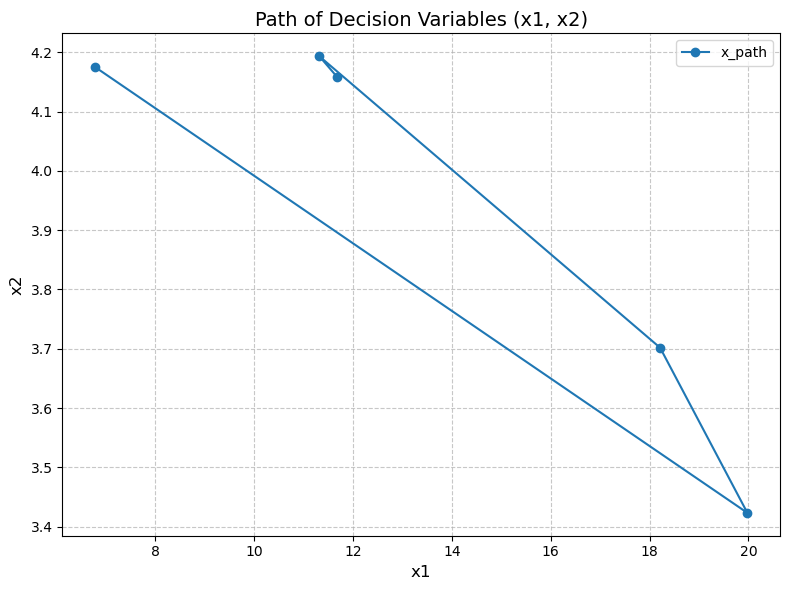

In [17]:
# Plot x_path for x1 and x2
x_path_array = np.array(x_path)  # Convert the list of arrays to a NumPy array
plt.figure(figsize=(8, 6))
plt.plot(x_path_array[:, 0], x_path_array[:, 1], marker='o', label='x_path')
plt.title('Path of Decision Variables (x1, x2)', fontsize=14)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

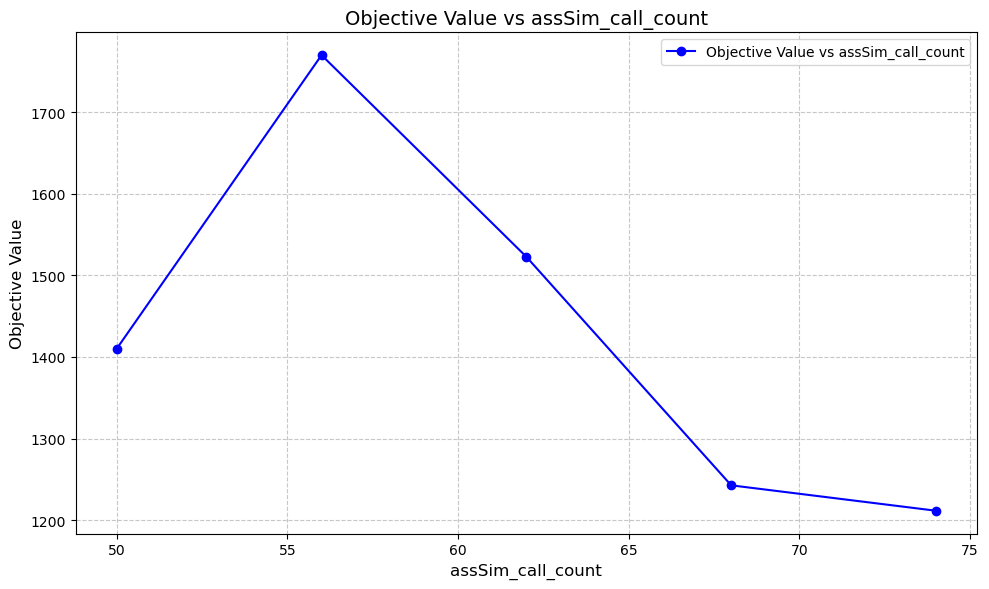

In [18]:
# Extract the number of calls and corresponding objective values
# add total_orginal_assSim_calls to each assSim_calls
assSim_calls = [log['assSim_calls'] + total_original_assSim_calls for log in iteration_log]
objective_values = y_path

# Plot
plt.figure(figsize=(10, 6))
plt.plot(assSim_calls, objective_values, marker='o', color='blue', label='Objective Value vs assSim_call_count')
plt.title('Objective Value vs assSim_call_count', fontsize=14)
plt.xlabel('assSim_call_count', fontsize=12)
plt.ylabel('Objective Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


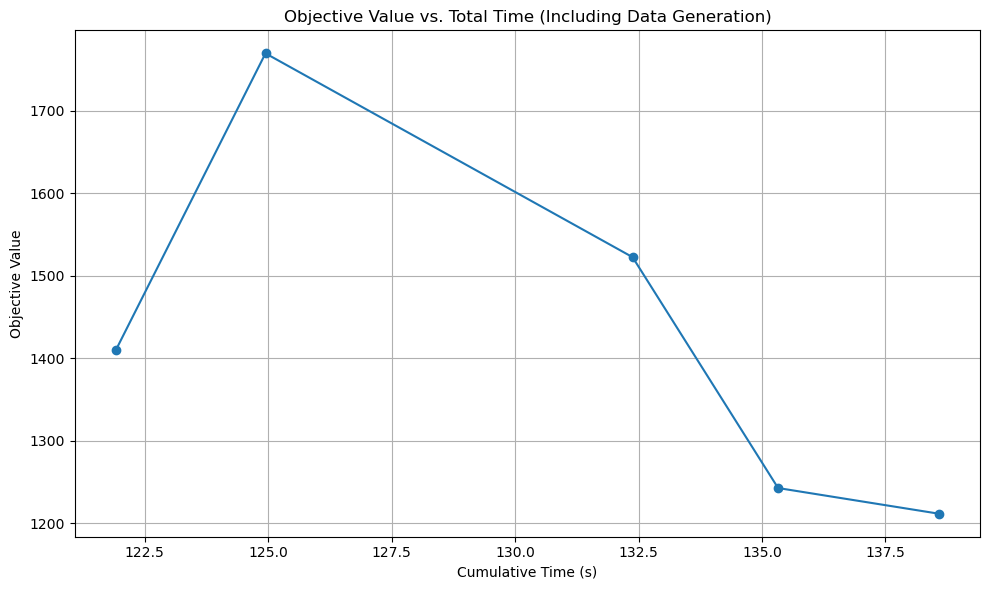

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Extract values from log
objectives = [log["y"] for log in iteration_log]
iteration_times = [log["time_sec"] for log in iteration_log]

# Get data generation time
data_gen_time = out.get("data_gen_time", 0.0)

# Compute cumulative time points (offset by data_gen_time)
cumulative_times = list(np.cumsum(iteration_times) + data_gen_time)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_times, objectives, marker='o', linestyle='-')
plt.xlabel("Cumulative Time (s)")
plt.ylabel("Objective Value")
plt.title("Objective Value vs. Total Time (Including Data Generation)")
plt.grid(True)
plt.tight_layout()
plt.show()


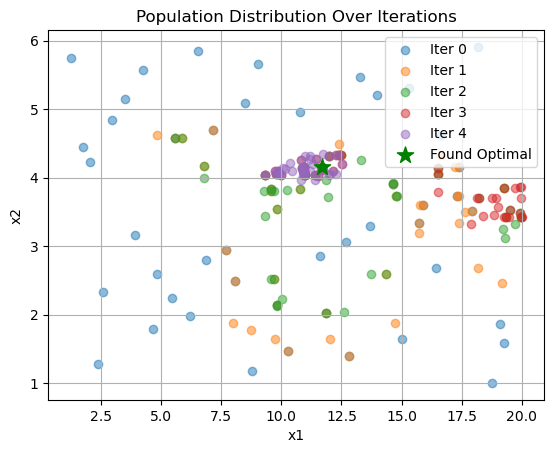

In [20]:
import matplotlib.pyplot as plt

def plot_population_evolution(all_pops, min, scaler):
    for i, pop in enumerate(all_pops):
        # Inverse transform the scaled population
        pop = scaler.inverse_transform(pop)
        # Extract x1 and x2 coordinates
        x = pop[:, 0]
        y = pop[:, 1]
        plt.scatter(x, y, alpha=0.5, label=f'Iter {i}')
    
    plt.title("Population Distribution Over Iterations")
    plt.xlabel("x1")
    plt.ylabel("x2")
    if min is not None:
        # Inverse transform the scaled minimum point
        min = scaler.inverse_transform(min)
        plt.scatter(min[0], min[1], color='red', marker='*', s=150, label='True Optimal')
    #plot the minimum point found by the model
    plt.scatter(out['x_path'][-1][0], out['x_path'][-1][1], color='green', marker='*', s=150, label='Found Optimal')
    

    plt.legend()
    plt.grid(True)
    plt.show()

plot_population_evolution(populations, None, scaler)


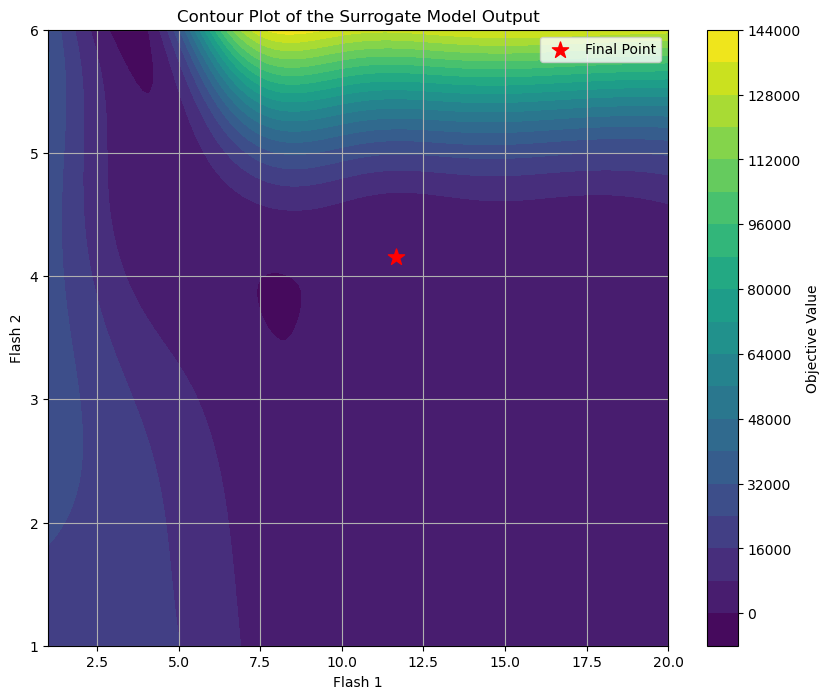

In [21]:
model.eval()

# Create a grid in scaled space
x_scaled = np.linspace(-1, 1, 100)
y_scaled = np.linspace(-1, 1, 100)
X_scaled, Y_scaled = np.meshgrid(x_scaled, y_scaled)

# Flatten and stack for batch inverse transform
grid_scaled = np.stack([X_scaled.ravel(), Y_scaled.ravel()], axis=1)

# Inverse transform to get physical domain
X_unscaled, _ = scaler.inverse_transform(grid_scaled, np.zeros((grid_scaled.shape[0], 1)))
X = X_unscaled[:, 0].reshape(X_scaled.shape)
Y = X_unscaled[:, 1].reshape(Y_scaled.shape)

# Evaluate model on scaled input grid
Z = np.zeros_like(X)
with torch.no_grad():
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            input_np = np.array([[X_scaled[i, j], Y_scaled[i, j]]])  # still scaled
            input_tensor = torch.tensor(input_np, dtype=torch.float32)
            output_scaled = model(input_tensor)
            _, output_unscaled = scaler.inverse_transform(input_np, output_scaled.numpy())
            Z[i, j] = output_unscaled.item()

# Plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='Objective Value')
plt.title('Contour Plot of the Surrogate Model Output')
plt.xlabel('Flash 1')
plt.ylabel('Flash 2')

# Plot final point
plt.scatter(out['x_path'][-1][0], out['x_path'][-1][1], color='red', marker='*', s=150, label='Final Point')

plt.legend()
plt.grid(True)
plt.show()


In [22]:
print(dataset)

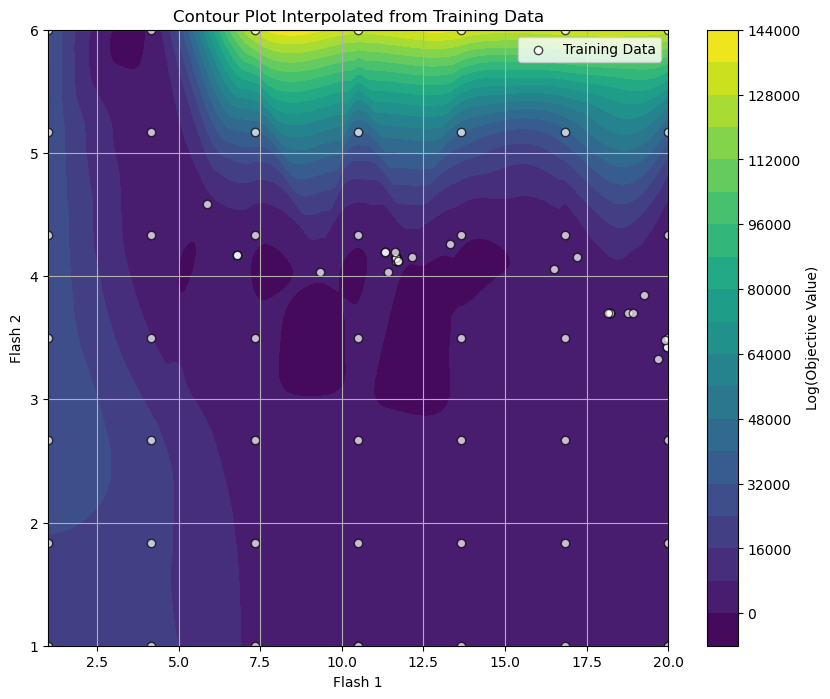

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Extract and inverse-transform dataset (if it's scaled)
X_scaled = dataset.data[:, :2]
Y_scaled = dataset.data[:, 2:]
X_unscaled, Y_unscaled = scaler.inverse_transform(X_scaled, Y_scaled)

# Flatten
x1 = X_unscaled[:, 0]
x2 = X_unscaled[:, 1]
y = Y_unscaled.flatten()

# Create a grid to interpolate over
grid_x, grid_y = np.meshgrid(
    np.linspace(x1.min(), x1.max(), 200),
    np.linspace(x2.min(), x2.max(), 200)
)

# Interpolate using griddata
grid_z = griddata((x1, x2), y, (grid_x, grid_y), method='cubic')

# Optional: log transform
# grid_z = np.log(grid_z + 1e-10)

# Plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(grid_x, grid_y, grid_z, levels=20, cmap='viridis')
plt.colorbar(contour, label='Log(Objective Value)')
plt.xlabel('Flash 1')
plt.ylabel('Flash 2')
plt.title('Contour Plot Interpolated from Training Data')
plt.scatter(x1, x2, color='white', edgecolor='black', label='Training Data', alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()
